<a href="https://colab.research.google.com/github/raymond98tan/raymond98tan.github.io/blob/master/Raymond_Tan_Build_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue> Spotify Dataset </font> 📊

📛 Name of dataset: Spotify dataset
<br> <br> 📍 Location of dataset (URL): Scraped from http://organizeyourmusic.playlistmachinery.com/ using my spotify playlists
<br><br>🧮 How many obeservations (rows) are there?: 2963
<br><br>🧮 How many features (columns) are there?: 15

🤔 What questions could you ask with this dataset?


1.   Can we infer someone's mood with their music data?
2.   Are we able to suggest playlist organization based on music similarity?

📝 Notes about this Dataset


*   This dataset is a compilation of some of my spotify playlists and includes many different genres of music

*   List item
*   List item


*   List item


### Attribute Information


*   <font color=red>**title**</font>: song title
*   <font color=red>**artist**</font>: artist name
*   <font color=red>**bpm**</font>: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
*   <font color=red>**ngry**</font>: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
*   <font color=red>**dnce**</font>: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
*   <font color=red>**dB**</font>: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
*   <font color=red>**live**</font>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
*   <font color=red>**val**</font>: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
*   <font color=red>**acous**</font>:  A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
*   <font color=red>**spch**</font>: 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.



### Data cleaning and pre-processing

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# file upload from computer
from google.colab import files
uploaded = files.upload()

In [ ]:
# read in dataset
df = pd.read_excel('MySpotifyPlaylistsData.xlsx')
df.head(10)

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,goosebumps,Travis Scott,rap,2016,2020‑08‑24,130,73,84,-3,15,43,244,8,5,90
1,lovely (with Khalid),Billie Eilish,electropop,2018,2020‑08‑24,115,30,35,-10,10,12,200,93,3,89
2,Jocelyn Flores,XXXTENTACION,emo rap,2017,2020‑08‑24,134,39,87,-9,30,44,119,47,24,88
3,SAD!,XXXTENTACION,emo rap,2018,2020‑08‑24,75,61,74,-5,12,47,167,26,14,87
4,Everybody Dies In Their Nightmares,XXXTENTACION,emo rap,2017,2020‑08‑24,130,57,73,-7,11,69,95,85,13,84
5,Young Dumb & Broke,Khalid,alternative r&b,2017,2020‑08‑24,137,54,80,-6,17,39,203,20,4,83
6,Call Out My Name,The Weeknd,canadian contemporary r&b,2018,2020‑08‑24,134,59,46,-5,31,18,228,17,4,83
7,No Role Modelz,J. Cole,conscious hip hop,2014,2020‑08‑24,100,52,70,-8,6,46,293,30,33,83
8,Chanel,Frank Ocean,alternative r&b,2017,2020‑08‑24,110,50,78,-6,11,47,210,87,24,82
9,Love On The Brain,Rihanna,barbadian pop,2016,2020‑08‑24,172,64,51,-5,8,38,224,7,5,81


In [ ]:
# Summary statistics for song list
df.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.00000,2963.000000
mean,2016.498144,112.979075,48.031050,64.813365,-9.072899,16.842052,42.911914,194.145798,42.049612,13.83699,51.541006
std,37.181993,31.761682,19.311942,13.737308,3.618742,12.435656,22.335648,67.498786,30.166876,12.84082,15.548901
min,0.000000,0.000000,1.000000,0.000000,-32.000000,2.000000,0.000000,22.000000,0.000000,0.00000,0.000000
25%,2016.000000,86.000000,34.000000,56.000000,-11.000000,10.000000,24.000000,153.000000,13.000000,5.00000,40.000000
50%,2017.000000,105.000000,47.000000,66.000000,-9.000000,12.000000,42.000000,194.000000,39.000000,9.00000,52.000000
75%,2019.000000,136.000000,62.000000,75.000000,-7.000000,18.000000,59.000000,232.000000,69.000000,19.00000,62.000000
max,2020.000000,241.000000,100.000000,97.000000,-1.000000,96.000000,99.000000,733.000000,99.000000,93.00000,99.000000


In [ ]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      2963 non-null   object
 1   artist     2963 non-null   object
 2   top genre  2833 non-null   object
 3   year       2963 non-null   int64 
 4   added      2963 non-null   object
 5   bpm        2963 non-null   int64 
 6   nrgy       2963 non-null   int64 
 7   dnce       2963 non-null   int64 
 8   dB         2963 non-null   int64 
 9   live       2963 non-null   int64 
 10  val        2963 non-null   int64 
 11  dur        2963 non-null   int64 
 12  acous      2963 non-null   int64 
 13  spch       2963 non-null   int64 
 14  pop        2963 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 347.4+ KB


In [ ]:
# removing unnecessary columns
df = df.drop(['top genre', 'year', 'added', 'pop', 'dur', 'bpm' ], axis=1)
df.head(10)

,title,artist,nrgy,dnce,dB,live,val,acous,spch
0,goosebumps,Travis Scott,73,84,-3,15,43,8,5
1,lovely (with Khalid),Billie Eilish,30,35,-10,10,12,93,3
2,Jocelyn Flores,XXXTENTACION,39,87,-9,30,44,47,24
3,SAD!,XXXTENTACION,61,74,-5,12,47,26,14
4,Everybody Dies In Their Nightmares,XXXTENTACION,57,73,-7,11,69,85,13
5,Young Dumb & Broke,Khalid,54,80,-6,17,39,20,4
6,Call Out My Name,The Weeknd,59,46,-5,31,18,17,4
7,No Role Modelz,J. Cole,52,70,-8,6,46,30,33
8,Chanel,Frank Ocean,50,78,-6,11,47,87,24
9,Love On The Brain,Rihanna,64,51,-5,8,38,7,5


In [ ]:
#Creating a copy with only numeric values
df_numeric = df.copy()
df_numeric = df.drop(['title', 'artist', 'live', 'spch'], axis=1)

# Normalizing df variables
min_max_scaler = preprocessing.MinMaxScaler()
df_numeric[['nrgy', 'dnce', 'dB', 'val', 'acous']] = min_max_scaler.fit_transform(df_numeric[['nrgy', 'dnce', 'dB', 'val', 'acous']])

In [ ]:
# Checking scaled values for df_numeric
df_numeric

,nrgy,dnce,dB,val,acous
0,0.727273,0.865979,0.935484,0.434343,0.080808
1,0.292929,0.360825,0.709677,0.121212,0.939394
2,0.383838,0.896907,0.741935,0.444444,0.474747
3,0.606061,0.762887,0.870968,0.474747,0.262626
4,0.565657,0.752577,0.806452,0.696970,0.858586
...,...,...,...,...,...
2958,0.939394,0.443299,0.935484,0.515152,0.010101
2959,0.565657,0.237113,0.774194,0.131313,0.333333
2960,0.575758,0.443299,0.774194,0.222222,0.060606
2961,0.959596,0.515464,0.935484,0.454545,0.515152


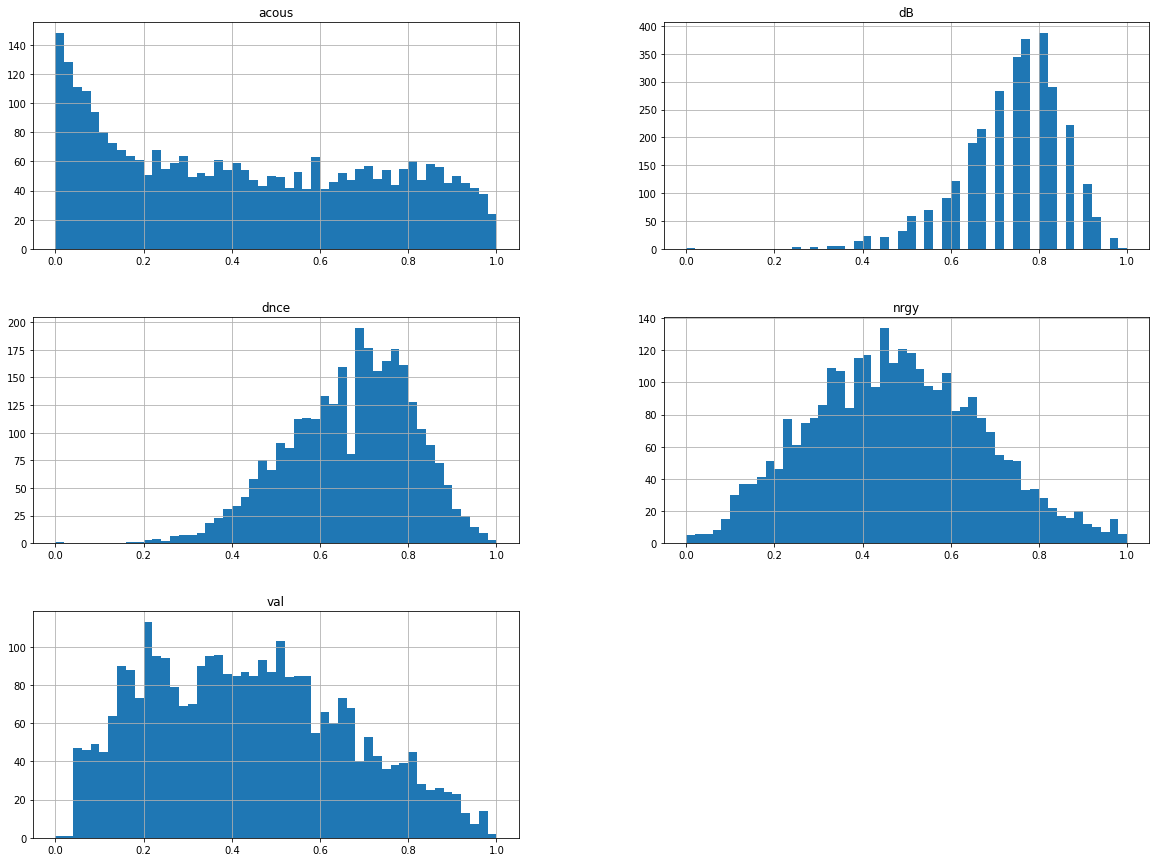

In [ ]:
#Histograms for the variables in the dataset
df_numeric.hist(bins=50,figsize=(20,15));

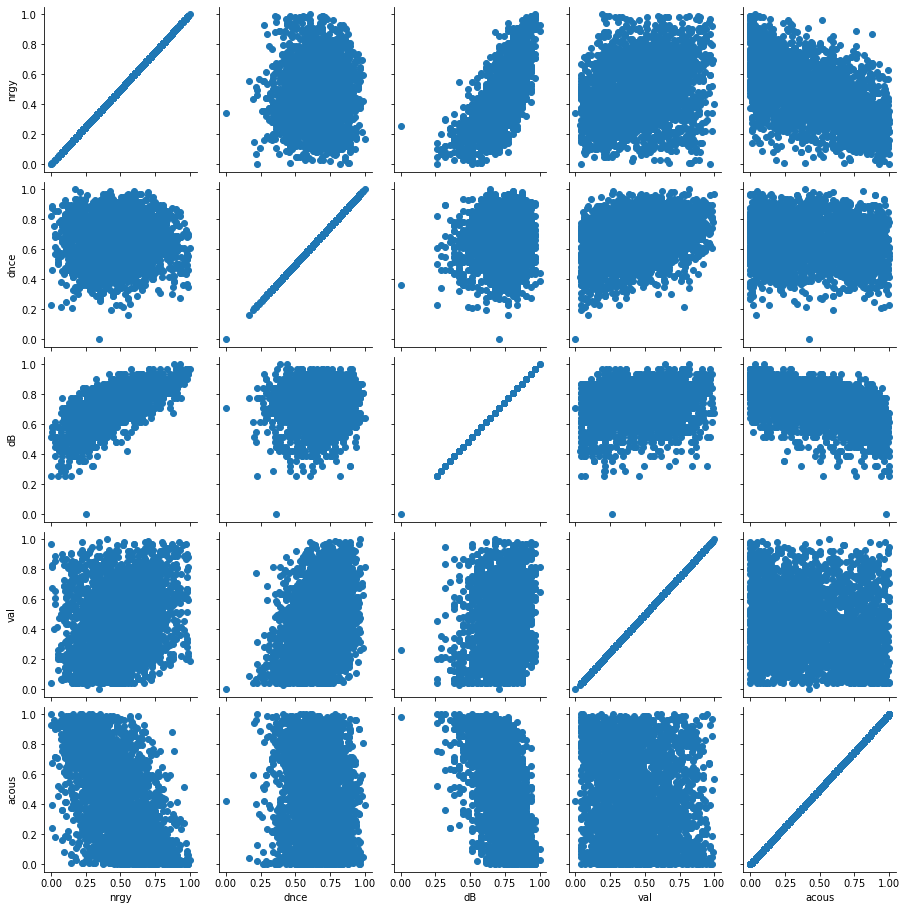

In [ ]:
# Pairplot
g = sns.PairGrid(df_numeric)
g.map(plt.scatter);

### K-Means Clustering

In [ ]:
# Elbow Plot
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_numeric)
    sum_of_squared_distances.append(km.inertia_)

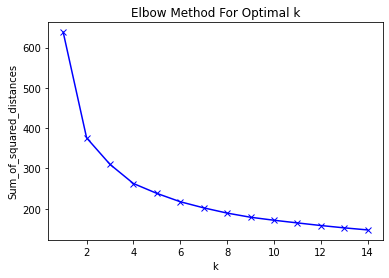

In [ ]:
# Elbow Plot
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<font color=red>From the elbow plot, it seems that the optimal k is 4.</font>

In [ ]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_numeric)
kmeans.cluster_centers_

array([[0.31198092, 0.59947022, 0.64928315, 0.24263468, 0.76734007],
       [0.65279517, 0.72640652, 0.82329157, 0.64572724, 0.15708045],
       [0.40602008, 0.71006746, 0.70499801, 0.60964584, 0.64272353],
       [0.51317548, 0.64522558, 0.77025873, 0.28282828, 0.20196208]])

In [ ]:
# Applying transformation for plot data
y_kmeans = kmeans.predict(df_numeric)
pca = PCA(2)
principal_components = pca.fit_transform(df_numeric)

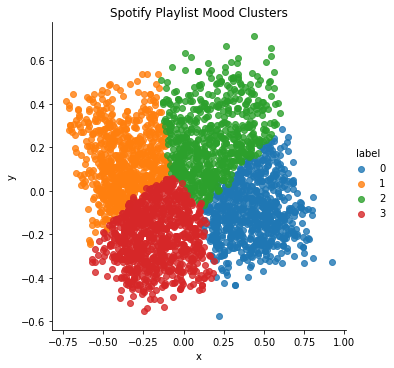

In [ ]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)
ax = plt.gca()
ax.set_title("Spotify Playlist Mood Clusters");

In [ ]:
# Labeling the songs by their cluster
df['label'] = y_kmeans
df_numeric['label'] = y_kmeans

df = df.sample(frac=1)

# Seeing how many songs are in each cluster
df['label'].value_counts()

3    869
1    726
0    720
2    648
Name: label, dtype: int64

### Looking inside the clusters

In [ ]:
# First 50 songs in cluster 0
df[df['label'] == 0].head(50)

,title,artist,nrgy,dnce,dB,live,val,acous,spch,label
1162,The Fog,Rexx Life Raj,43,64,-10,13,33,63,28,0
171,She's Mine Pt. 1,J. Cole,20,44,-15,28,4,77,6,0
1540,Smiley Boy - Live,Mac Ayres,24,66,-10,15,28,75,6,0
744,Someone Else,Aftertheparty,38,55,-10,10,34,73,29,0
316,Stranglehold,Kevin Garrett,43,46,-11,12,37,50,5,0
259,So Far Gone / Fast Life Bluez,Brent Faiyaz,44,51,-12,23,12,84,22,0
1652,Dangerous (feat. Kid Cudi),ScHoolboy Q,54,41,-9,8,6,64,10,0
67,Nikes,Frank Ocean,39,54,-10,11,12,70,9,0
1064,Naked,Sabrina Claudio,34,50,-12,51,33,72,9,0
1779,Someday,dryhope,20,44,-15,25,19,58,11,0


nrgy     31.886111
dnce     58.148611
dB      -11.872222
live     14.958333
val      24.020833
acous    75.966667
spch     10.580556
label     0.000000
dtype: float64


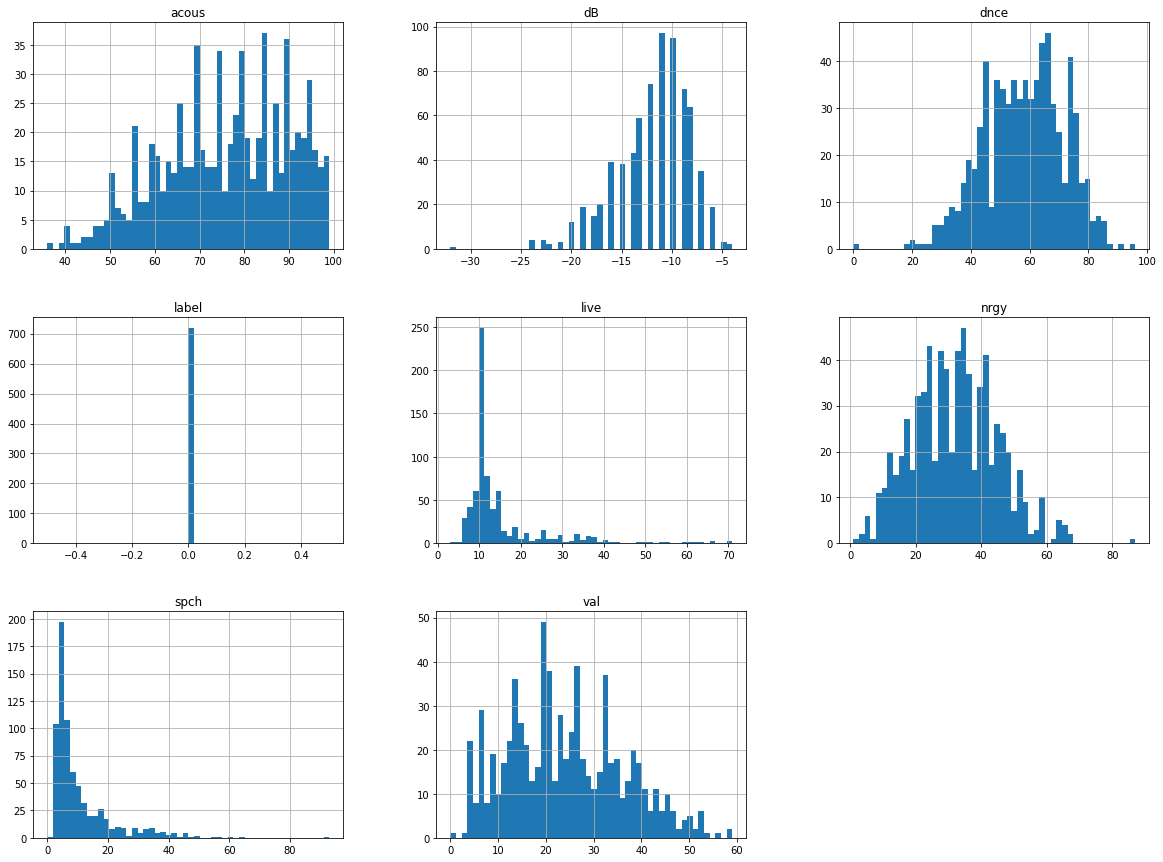

In [ ]:
# Cluster 0 Means and Histograms for each variable
print(df[df['label']==0].mean())
df[df['label']==0].hist(bins=50,figsize=(20,15));

In [ ]:
# First 50 songs in cluster 1
df[df['label'] == 1].head(50)

,title,artist,nrgy,dnce,dB,live,val,acous,spch,label
524,Pussy Is God,King Princess,62,74,-7,7,46,5,24,1
2598,Tony's Belated Breakfast,Birocratic,89,65,-6,38,63,5,8,1
509,Hundred,Khalid,48,77,-10,38,48,5,6,1
635,DISTRICT,BROCKHAMPTON,74,66,-7,21,52,5,8,1
2929,Fairy Tale,Ta-ku,67,76,-11,16,64,41,4,1
913,Just a Friend,Biz Markie,66,86,-9,32,84,12,21,1
978,KeeP IN tOUcH (feat. Bryson Tiller),Tory Lanez,89,54,-4,10,56,31,49,1
35,Let Me Love You,Mario,58,66,-9,12,56,24,9,1
2708,sidra,The Deli,51,82,-8,29,83,0,7,1
418,Drowning (feat. Kodak Black),A Boogie Wit da Hoodie,81,84,-5,12,81,50,6,1


nrgy     65.626722
dnce     70.461433
dB       -6.477961
live     18.415978
val      63.926997
acous    15.550964
spch     15.615702
label     1.000000
dtype: float64


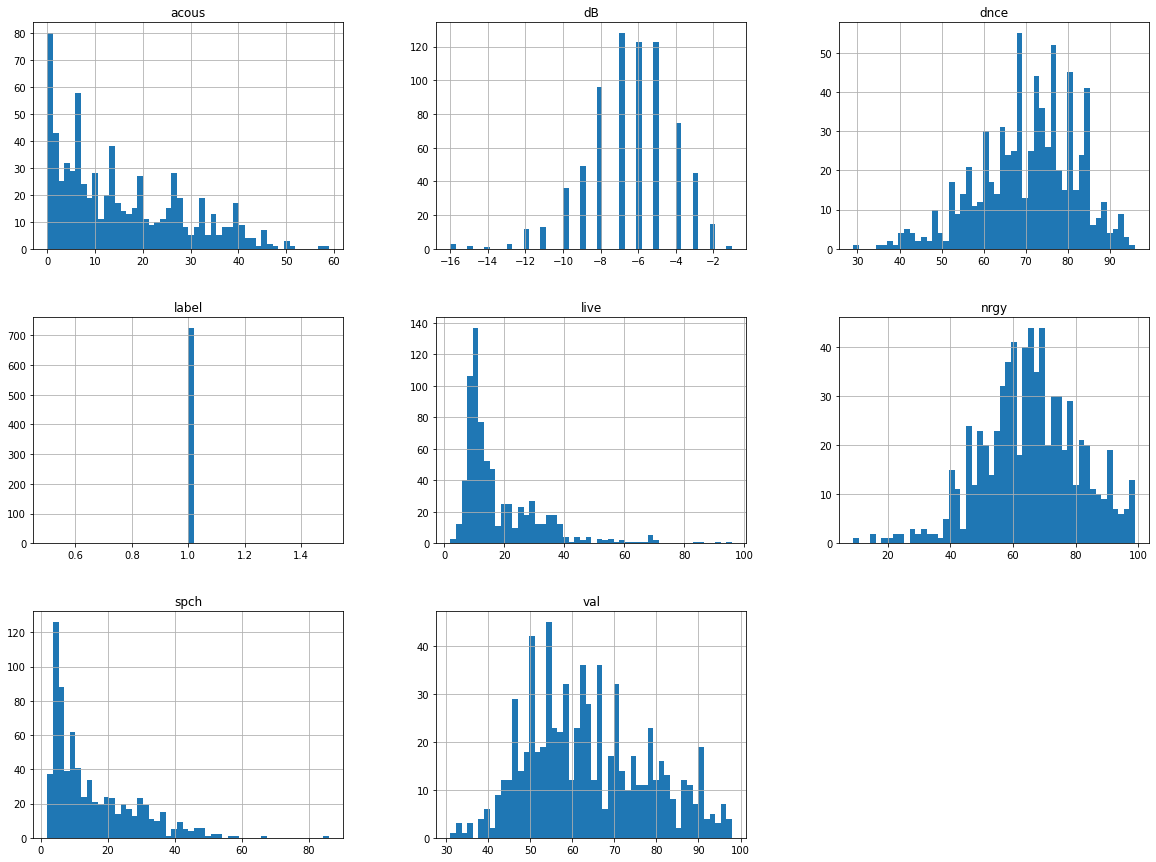

In [ ]:
# Cluster 1 Means and Histograms for each variable
print(df[df['label']==1].mean())
df[df['label']==1].hist(bins=50,figsize=(20,15));

In [ ]:
# First 50 songs in Cluster 2
df[df['label'] == 2].head(50)

,title,artist,nrgy,dnce,dB,live,val,acous,spch,label
1459,Feel A Way.,Kiana Ledé,45,82,-8,10,43,72,15,2
1976,Broke,Jennifer Chung,61,70,-5,10,66,68,42,2
1023,Would You,Pink Sweat$,19,71,-11,8,50,69,4,2
1705,Espresso,Aso,33,81,-13,70,53,94,17,2
1899,Clicquot Shower - A COLORS SHOW,Caleborate,51,77,-11,9,57,50,45,2
1227,P*$$Y Fairy (OTW),Jhené Aiko,52,57,-7,10,35,54,21,2
202,Lens,Frank Ocean,33,68,-9,9,56,59,10,2
1858,Buying Time,Lucky Daye,44,77,-9,17,67,73,4,2
80,FACE,BROCKHAMPTON,70,95,-5,8,68,59,12,2
2338,crystals,Flavors,28,58,-12,11,53,76,77,2


nrgy     41.195988
dnce     68.876543
dB      -10.145062
live     16.146605
val      60.354938
acous    63.629630
spch     16.987654
label     2.000000
dtype: float64


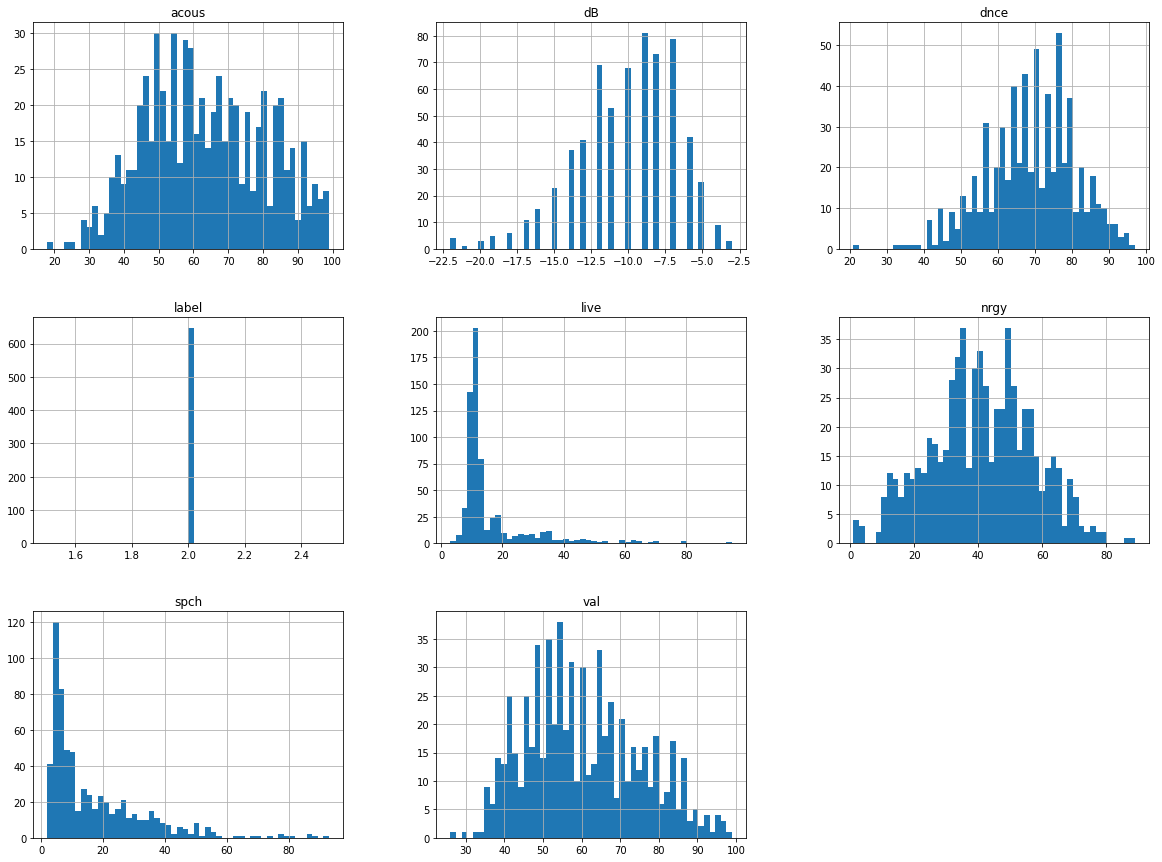

In [ ]:
# Cluster 2 Means and Histograms for each variable
print(df[df['label']==2].mean())
df[df['label']==2].hist(bins=50,figsize=(20,15));

In [ ]:
# Last 50 songs in cluster 3
df[df['label'] == 3].tail(50)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#df[df['label'] == 3]

,title,artist,nrgy,dnce,dB,live,val,acous,spch,label
1110,Paris,Nakala,47,68,-12,7,36,34,8,3
2175,Getting to Know You,Spazzkid,54,56,-8,27,35,14,13,3
1375,K.,Cigarettes After Sex,40,45,-10,14,31,15,3,3
9,Love On The Brain,Rihanna,64,51,-5,8,38,7,5,3
916,Truth Is,Sabrina Claudio,73,65,-3,11,16,59,7,3
1356,Switchblade,NIKI,69,69,-6,4,30,35,8,3
1428,U,H.E.R.,66,66,-8,14,29,1,4,3
2203,hours,TOSHIKI HAYASHI(%C),51,61,-8,13,38,5,3,3
1350,HML (feat. A Boogie Wit da Hoodie),Melii,71,58,-5,18,34,14,10,3
125,Shot For Me,Drake,47,57,-12,57,18,6,24,3


In [ ]:
# Cluster 3 Means and Histograms for each variable
print(df[df['label']==3].mean())
df[df['label']==3].hist(bins=50,figsize=(20,15));

nrgy     51.804373
dnce     62.586881
dB       -8.121979
live     17.606444
val      28.000000
acous    19.994246
spch     12.699655
label     3.000000
dtype: float64

The songs that were in this cluster had a much slower beat. Judging from the lyrics, many of the songs within the cluster were also sad songs.

In [ ]:
print(df_numeric[df_numeric['label']==0].mean())
print(df_numeric[df_numeric['label']==1].mean())
print(df_numeric[df_numeric['label']==2].mean())
print(df_numeric[df_numeric['label']==3].mean())

nrgy     0.311981
dnce     0.599470
dB       0.649283
val      0.242635
acous    0.767340
label    0.000000
dtype: float64
nrgy     0.652795
dnce     0.726407
dB       0.823292
val      0.645727
acous    0.157080
label    1.000000
dtype: float64
nrgy     0.406020
dnce     0.710067
dB       0.704998
val      0.609646
acous    0.642724
label    2.000000
dtype: float64
nrgy     0.513175
dnce     0.645226
dB       0.770259
val      0.282828
acous    0.201962
label    3.000000
dtype: float64


### Plot of cluster feature means

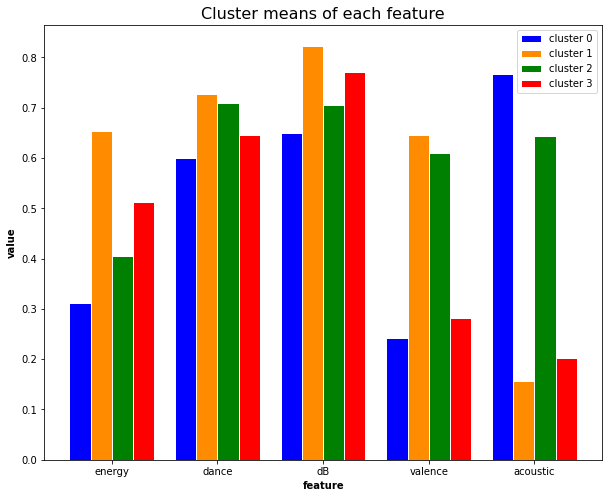

In [ ]:
# Bar Plot of the Cluster Means of Each Feature
fig, ax = plt.subplots(figsize=(10, 8))

# set width of bar
barWidth = 0.4
 
# set height of bar
cluster0_means = [0.311981, 0.599470, 0.649283, 0.242635, 0.767340]
cluster1_means = [0.652795, 0.726407, 0.823292, 0.645727, 0.157080]
cluster2_means = [0.406020, 0.710067, 0.704998, 0.609646, 0.642724]
cluster3_means = [0.513175, 0.645226, 0.770259, 0.282828, 0.201962]

# Set position of bar on X axis
r1 = np.arange(0, len(cluster0_means) * 2, 2)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
ax.bar(r1, cluster0_means, color='blue', width=barWidth, edgecolor='white', label='cluster 0')
ax.bar(r2, cluster1_means, color='darkorange', width=barWidth, edgecolor='white', label='cluster 1')
ax.bar(r3, cluster2_means, color='green', width=barWidth, edgecolor='white', label='cluster 2')
ax.bar(r4, cluster3_means, color='red', width=barWidth, edgecolor='white', label='cluster 3')
 
# Add xticks on the middle of the group bars
plt.ylabel('value', fontweight='bold')
plt.xlabel('feature', fontweight='bold')
plt.xticks([r + barWidth + .2 for r in r1], ['energy', 'dance', 'dB', 'valence', 'acoustic'])
 
# Set title
ax.set_title('Cluster means of each feature', fontsize = 16)

# Trying to print value of bar ontop of the bar
# for i, v in enumerate(cluster0_means):
#     plt.text(cluster0_means[i] - 0.5, v + 0.1, str(v))

# Create legend & Show graphic
plt.legend()
plt.show()

### Pairplots of each cluster

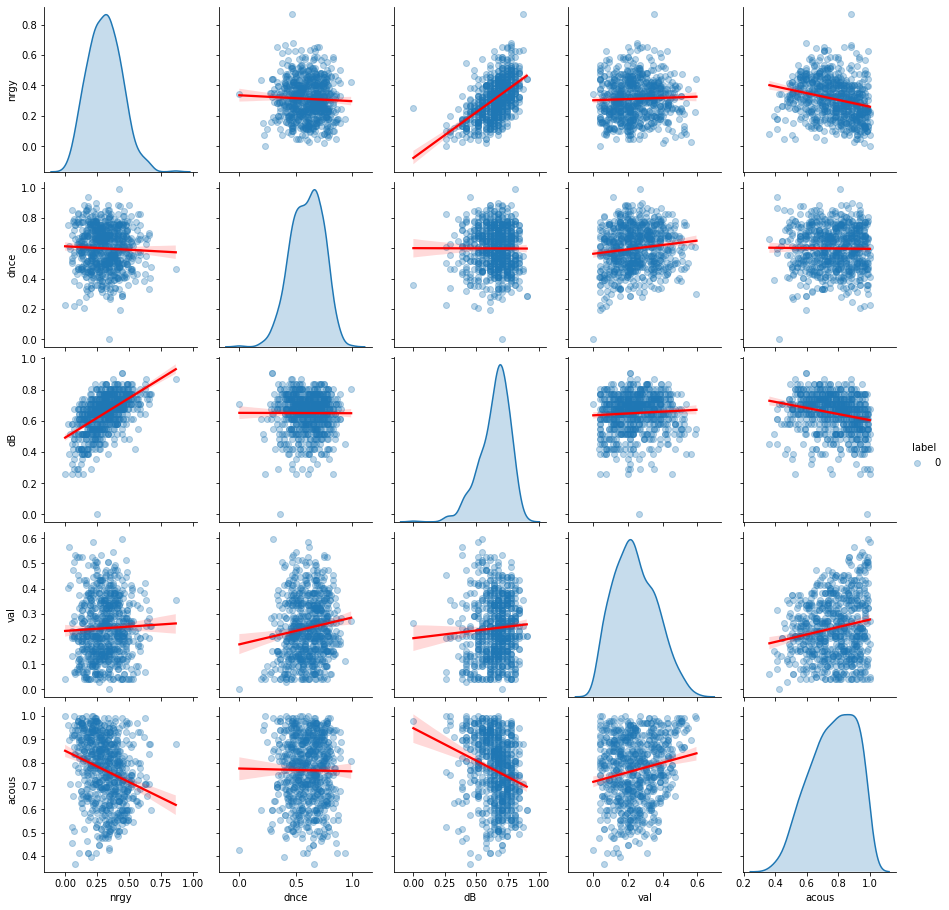

In [ ]:
# Pairplot of features in cluster 0
g2 = sns.pairplot(df_numeric[df_numeric['label']==0], kind='reg', hue='label', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})
g2;

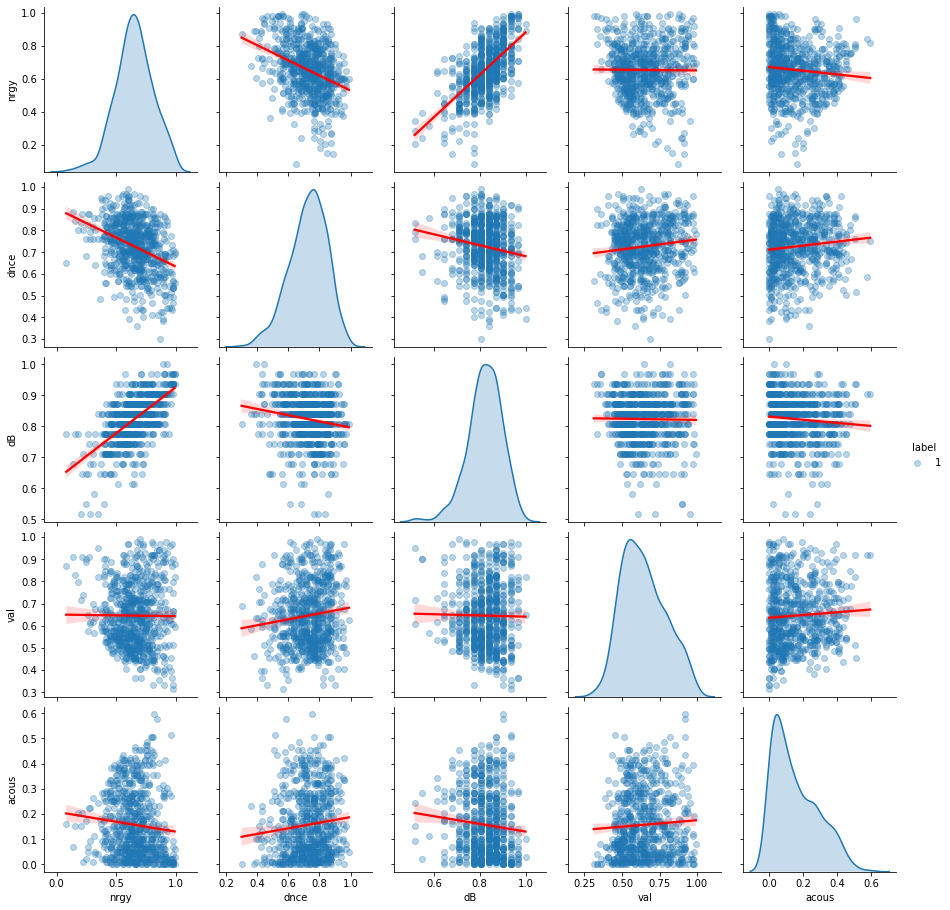

In [ ]:
# Pairplot of features in cluster 1
g3 = sns.pairplot(df_numeric[df_numeric['label']==1], kind='reg', hue='label', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})
g3;

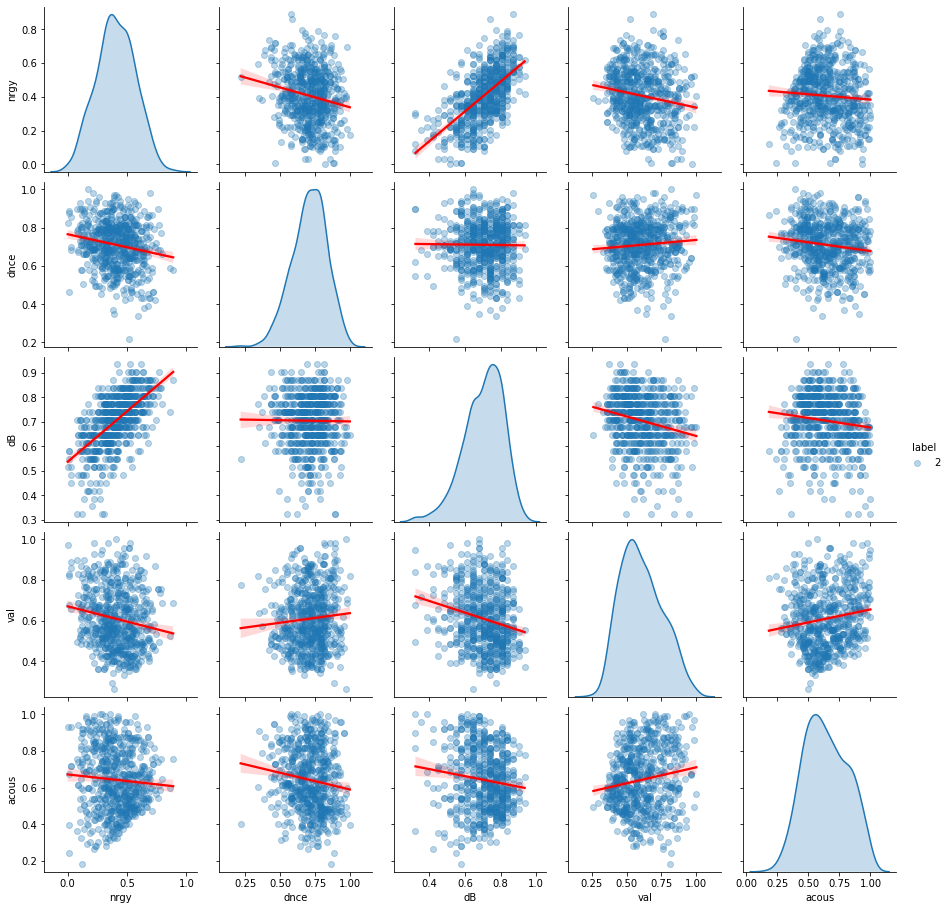

In [ ]:
# Pairplot of features in cluster 2
g4 = sns.pairplot(df_numeric[df_numeric['label']==2], kind='reg', hue='label', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})
g4;

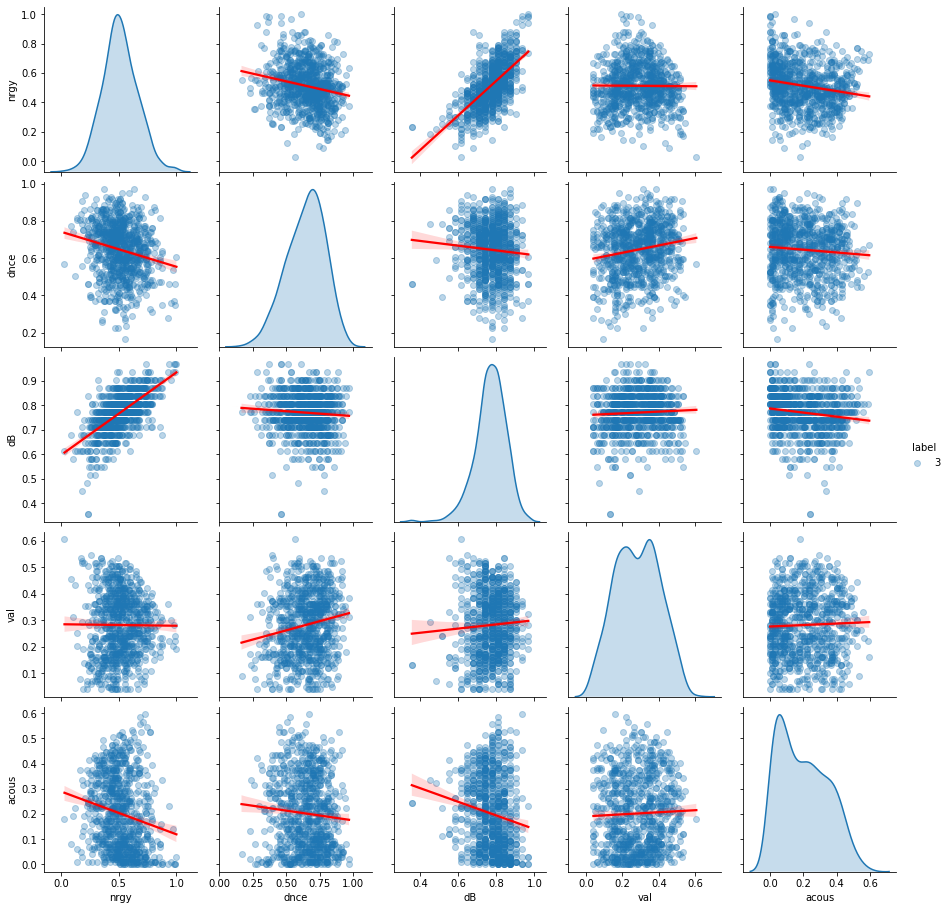

In [ ]:
# Pairplot of features in cluster 3
g5 = sns.pairplot(df_numeric[df_numeric['label']==3], kind='reg', hue='label', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})
g5;